In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [2]:
edges=pd.read_csv('../csv/edges.csv')
edges[['source','target','weight']].to_csv('../csv/edges_networkx.csv',index=False,header=False)

In [3]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2101
Number of edges: 24339
Average degree:  23.1690


In [4]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 942
Number of edges: 5959
Average degree:  12.6518


In [5]:
deg = g.degree()
to_remove = [n for n in deg if deg[n] == 0]
g.remove_nodes_from(to_remove)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 937
Number of edges: 5959
Average degree:  12.7193


In [6]:
spring_pos = nx.spring_layout(g)

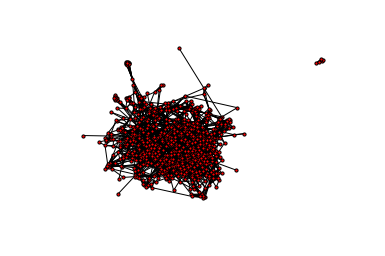

In [7]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, with_labels = False, node_size = 10)


In [8]:
parts = community.best_partition(g)
community.modularity(parts,g)


0.8527721595090997

In [9]:
values = [parts.get(node) for node in g.nodes()]
max(values)

26

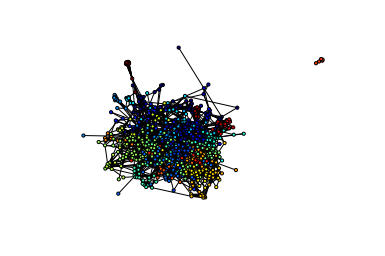

In [10]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 10, with_labels = False)


In [11]:
old_nodes_df['cluster']=0

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])

In [13]:
df=old_nodes_df

In [14]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [15]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
docs=df.label

In [17]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [18]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [19]:
df['ind']=df.index
df['terms']= docs_stemed

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [21]:
dg.sort_values('cluster size')

,cluster size,keyword,key terms
22,5,"[(negoti, 6), (support, 2), (analysi, 2)]","[(negoti support, 2)]"
25,10,"[(creativ, 9), (idea, 4), (system, 3), (develop, 2), (techniqu, 2)]","[(creativ support, 2), (support system, 2), (idea gener, 2)]"
20,11,"[(piraci, 6), (ethic, 5), (softwar, 3), (model, 3), (comput, 2)]","[(softwar piraci, 3), (piraci price, 2)]"
15,14,"[(outsourc, 12), (technolog, 6), (transact, 3), (empir, 2), (perform, 2)]","[(technolog outsourc, 4), (system outsourc, 2)]"
26,14,"[(applic, 2), (industri, 2), (market, 2), (privat, 2), (advantag, 2)]",[]
23,17,"[(system, 7), (explan, 5), (expert, 5), (knowledgebas, 5), (expertsystem, 3)]","[(expert system, 4), (knowledgebas explan, 2), (theoret foundat, 2), (induct expert, 2), (knowledgebas system, 2)]"
24,19,"[(job, 7), (career, 7), (profession, 6), (turnov, 4), (examin, 4)]","[(system profession, 3), (career orient, 2), (human resourc, 2), (technolog worker, 2), (job skill, 2)]"
9,23,"[(suppli, 9), (chain, 8), (edi, 7), (electron, 5), (integr, 4)]","[(suppli chain, 8), (electron data, 3), (data interchang, 3), (edi usag, 2)]"
16,23,"[(network, 15), (document, 5), (electron, 3), (manag, 3), (analysi, 3)]","[(analysi data, 2), (electron network, 2), (empir analysi, 2), (selforgan map, 2), (network extern, 2)]"
2,24,"[(busi, 7), (process, 7), (workflow, 6), (reengin, 5), (distribut, 5)]","[(busi process, 5), (workflow manag, 2), (balanc qualiti, 2), (process model, 2)]"


In [22]:
df[df.cluster==16]

,id,label,PY,SO,cluster,cluster size,ind,terms
794,794,"Network effects and technology licensing with fixed fee, royalty, and hybrid contracts",2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,794,"[network, technolog, licens, fix, fee, royalti, hybrid, contract]"
797,797,Accommodating individual preferences in the categorization of documents: A personalized clustering approach,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,797,"[accommod, individu, prefer, categor, document, person, cluster, approach]"
877,877,Coauthorship dynamics and knowledge capital: The patterns of cross-disciplinary collaboration in information systems research,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,877,"[coauthorship, dynam, knowledg, capit, pattern, crossdisciplinari, collabor, system]"
898,898,A pricing mechanism for digital content distribution over computer networks,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,898,"[price, mechan, digit, distribut, comput, network]"
942,942,Genetic programming-based discovery of ranking functions for effective Web search,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,942,"[genet, programmingbas, discoveri, rank, function, effect, web, search]"
951,951,Why should I share? Examining social capital and knowledge contribution in electronic networks of practice,2005,MIS QUARTERLY,16,23,951,"[share, examin, social, capit, knowledg, contribut, electron, network, practic]"
999,999,An empirical analysis of network externalities in peer-to-peer music-sharing networks,2004,INFORMATION SYSTEMS RESEARCH,16,23,999,"[empir, analysi, network, extern, peertop, musicshar, network]"
1004,1004,Measuring firm performance at the network level: A nomology of the business impact of digital supply networks,2004,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,1004,"[measur, firm, perform, network, nomolog, busi, digit, suppli, network]"
1099,1099,Generating and browsing multiple taxonomies over a document collection,2003,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,1099,"[gener, brows, multipl, taxonomi, document, collect]"
1177,1177,Contents matching defined by prototypes: Methodology verification with books of the bible,2002,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,16,23,1177,"[content, match, defin, prototyp, methodolog, verif, book, bibl]"


In [27]:
df[df.id==1656]

,id,label,PY,SO,cluster,cluster size,ind,terms
1656,1656,ACADEMIC ISSUES IN MIS - JOURNALS AND BOOKS,1991,MIS QUARTERLY,26,14,1656,"[academ, issu, mi, , journal, book]"


In [ ]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
com=community.induced_graph(parts,G_fb)
nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)